In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False})
import math

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston
from sklearn.compose import make_column_transformer

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# 자동차 가격 데이터 불러오기
train_df = pd.read_excel('data/hyundaiCar.xlsx', sheet_name='train', thousands=',')
test_df =  pd.read_excel('data/hyundaiCar.xlsx', sheet_name='test', thousands=',')

display(train_df, test_df)

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1915,2015,대형,6.8,159,23.0,LPG,0,2359,1935,수동
1,1164,2012,소형,13.3,108,13.9,가솔린,0,1396,1035,자동
2,2817,2015,중형,14.4,184,41.0,디젤,0,1995,1792,자동
3,2160,2015,대형,10.9,175,46.0,디젤,0,2497,2210,수동
4,1915,2015,대형,6.4,159,23.0,LPG,0,2359,1935,자동
5,1560,2015,소형,18.0,136,30.6,디젤,0,1582,1160,자동
6,2260,2015,준중형,13.9,184,41.0,디젤,0,1995,1611,수동
7,1430,2015,대형,8.9,133,26.5,디젤,0,2497,1696,수동
8,2260,2015,준중형,12.5,184,41.0,디젤,0,1995,1611,자동
9,1690,2015,준중형,12.8,215,21.3,가솔린,0,1999,1216,수동


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      71 non-null     int64  
 1   년식      71 non-null     int64  
 2   종류      71 non-null     object 
 3   연비      71 non-null     float64
 4   마력      71 non-null     int64  
 5   토크      71 non-null     float64
 6   연료      71 non-null     object 
 7   하이브리드   71 non-null     int64  
 8   배기량     71 non-null     int64  
 9   중량      71 non-null     int64  
 10  변속기     71 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 6.2+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      31 non-null     int64  
 1   년식      31 non-null     int64  
 2   종류      31 non-null     object 
 3   연비      31 non-null     float64
 4   마력      31 non-null     int64  
 5   토크      31 non-null     float64
 6   연료      31 non-null     object 
 7   하이브리드   31 non-null     int64  
 8   배기량     31 non-null     int64  
 9   중량      31 non-null     int64  
 10  변속기     31 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 2.8+ KB


In [8]:
# 학습, 테스트셋 구성
x_train = train_df.drop('가격', axis=1)
y_train = train_df['가격']

x_test = test_df.drop('가격', axis=1)
y_test = test_df['가격']

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((71, 10), (31, 10), (71,), (31,))

### 문자열 encoding
- Label Encoding
    - 문자열을 숫자로 바꿔준다
- One-Hot Encoding
    - 문자열을 0과 1로만 이루어진 형태로 바꿔준다
- pandas dummy
    - pandas에서 제공하는 One-Hot Encoding
- replace
- make_column_transformer

#### Label Encoding 예시

In [12]:
# 종류 컬럼의 데이터 
sorted(x_train['종류'].unique())

['대형', '소형', '준중형', '중형']

In [14]:
label = LabelEncoder()
# 라벨 인코더 학습 및 변환
x_train_label = label.fit_transform(x_train['종류'])
x_train_label

array([2, 2, 1, 1, 0, 3, 3, 1, 3, 1, 2, 3, 2, 0, 1, 0, 0, 0, 3, 0, 0, 3,
       2, 0, 3, 3, 3, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0,
       0, 2, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 2, 0, 0, 2, 0, 1, 0, 0, 1,
       3, 1, 2, 3, 0])

In [15]:
# 라벨 인코더가 학습한 클래스
label.classes_

array(['대형', '소형', '준중형', '중형'], dtype=object)

In [18]:
label.transform(label.classes_)

array([0, 1, 2, 3])

대형 -> 0, 소형 -> 1, 준준형 -> 2, 중형 -> 3 이렇게 변환됐다

In [20]:
# 역변환
label.inverse_transform([1])

array(['소형'], dtype=object)

#### One-Hot Encoding 예시

In [26]:
one = OneHotEncoder()
# 원-핫 인코더에는 입력을 행렬 형태로 줘야한다
x_train_one = one.fit_transform(x_train['종류'].values.reshape(-1, 1))
x_train_one

<71x4 sparse matrix of type '<class 'numpy.float64'>'
	with 71 stored elements in Compressed Sparse Row format>

In [31]:
# 학습한 데이터
one.categories_

[array(['대형', '소형', '준중형', '중형'], dtype=object)]

In [35]:
one.transform(np.array(one.categories_).reshape(-1, 1)).toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [29]:
# 변환 결과
x_train_one.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],


#### pandas dummy 예시 

In [36]:
pd.get_dummies(x_train['종류'])

,대형,소형,준중형,중형
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
66,0,0,0,1
67,0,1,0,0
68,0,0,1,0
69,0,0,0,1


#### replace

In [41]:
x_train['종류'].replace(['대형', '중형', '준중형', '소형'], range(4))

0     2
1     2
2     3
3     3
4     0
     ..
66    1
67    3
68    2
69    1
70    0
Name: 종류, Length: 71, dtype: int64

#### make_column_transformer(One-Hot Encoder만 가능 Label Encoder 안됨)

In [43]:
myt = make_column_transformer((OneHotEncoder(), ['종류', '연료', '변속기']))
myt.fit_transform(x_train)

array([[0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0.

### 문자열 encoding 후 학습

In [66]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [72]:
model = make_pipeline(myt, Ridge())
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid = GridSearchCV(model, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['종류',
                                                                          '연료',
                                                                          '변속기'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [73]:
grid.best_params_

{'ridge__alpha': 1}

In [74]:
grid.cv_results_

{'mean_fit_time': array([0.01142735, 0.00524173, 0.00454912, 0.00471516, 0.0055635 ,
        0.0049386 ]),
 'std_fit_time': array([0.00575623, 0.00056474, 0.00026154, 0.00043365, 0.00121444,
        0.000693  ]),
 'mean_score_time': array([0.00652966, 0.00333962, 0.00262518, 0.00268221, 0.0031621 ,
        0.00319695]),
 'std_score_time': array([3.02497517e-03, 7.29825910e-04, 6.85462993e-05, 1.17742672e-04,
        6.82214663e-04, 8.02072035e-04]),
 'param_ridge__alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ridge__alpha': 0.001},
  {'ridge__alpha': 0.01},
  {'ridge__alpha': 0.1},
  {'ridge__alpha': 1},
  {'ridge__alpha': 10},
  {'ridge__alpha': 100}],
 'split0_test_score': array([ 0.02208793,  0.02244243,  0.02575232,  0.04110919, -0.1148921 ,
        -0.56620767]),
 'split1_test_score': array([0.5945134 , 0.5944033 , 0.59325875, 0.57889495, 0.4

In [75]:
grid.best_score_

0.07773021333187487

In [76]:
grid.best_estimator_.predict(x_train)

array([2703.10731304, 2703.10731304, 1120.22627811, 1674.28713094,
       3168.37371885, 2710.10577755, 2710.10577755, 1674.28713094,
       3397.09695826, 1674.28713094, 2016.11613233, 2710.10577755,
       1462.0552795 , 1949.28482334, 1674.28713094, 2614.31286601,
       2614.31286601, 3855.36489956, 2710.10577755, 3855.36489956,
       2503.34567617, 3397.09695826, 1462.0552795 , 2614.31286601,
       2710.10577755, 2710.10577755, 2710.10577755, 1674.28713094,
       1120.22627811, 2703.10731304, 3855.36489956, 3855.36489956,
       3168.37371885, 1949.28482334,  433.2350974 , 2614.31286601,
       2149.04646021, 2503.34567617, 1351.08808966, 1674.28713094,
       1674.28713094, 1674.28713094, 3168.37371885, 3855.36489956,
       3168.37371885, 2703.10731304, 1120.22627811, 3855.36489956,
       2016.11613233, 1120.22627811, 3397.09695826, 3397.09695826,
       3855.36489956, 1462.0552795 , 2149.04646021, 2614.31286601,
       2156.04492472, 2016.11613233, 3168.37371885, 3168.37371

In [77]:
grid.best_estimator_.score(x_train, y_train)

0.4141575733955909

In [78]:
grid.best_estimator_.score(x_test, y_test)

0.2798606477101978

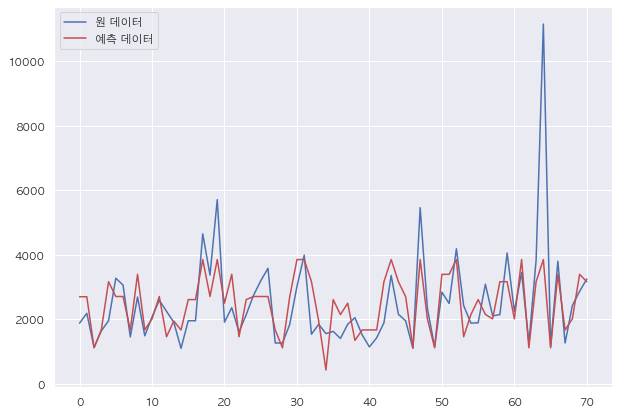

In [82]:
plt.plot(y_train, label='원 데이터')
plt.plot(grid.best_estimator_.predict(x_train), c='r', label='예측 데이터')
plt.legend()
plt.show()

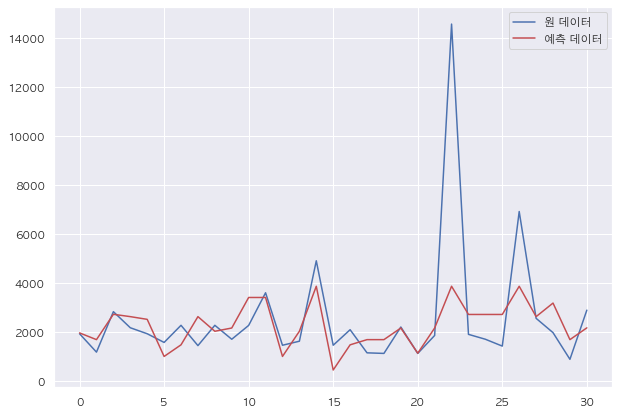

In [83]:
plt.plot(y_test, label='원 데이터')
plt.plot(grid.best_estimator_.predict(x_test), c='r', label='예측 데이터')
plt.legend()
plt.show()